# Titanic Survival Prediction

# Exploratory Data Analysis  (EDA)


In [29]:
# Import Standard Libraries
import numpy as np
import pandas as pd


# Import Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning Libraries
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score as score
from sklearn.linear_model import LogisticRegression as LR 

In [30]:
# Dataset
train = pd.read_csv('tested.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [32]:
train['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [33]:
train['Sex'].value_counts()


Sex
male      266
female    152
Name: count, dtype: int64

### understanding the data

In [34]:
# information about Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [36]:
# Shape of Dataset
train.shape

(418, 12)

In [37]:
# Column Names
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
# Unique Values
train.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

## Data Cleaning

In [39]:
# Missing Values
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [40]:
# NUMBER Missing Values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
# Removing Usefuless Columns
train.drop(['PassengerId','Name','Cabin','Embarked','Fare'],axis=1,inplace=True)

# Replace Null Values of Age
train['Age'].fillna(train['Age'].mean(),inplace=True)

# Replace male and female values of sex
# train.replace({'female':0,'male':1},inplace=True)

train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket
0,0,3,male,34.5,0,0,330911
1,1,3,female,47.0,1,0,363272
2,0,2,male,62.0,0,0,240276
3,0,3,male,27.0,0,0,315154
4,1,3,female,22.0,1,1,3101298


In [42]:
# train.loc[~np.isinf(train['Age'])]
# train['Age'].unique()

In [43]:
# Look at Null Values
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
dtype: int64

### Pivot Table 
#### check mean of sex column 

In [44]:
train.pivot_table(index='Sex',values='Survived',aggfunc='mean',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,1.0,1.0,1.0
male,0.0,0.0,0.0


#### so all female is survived and all male is died.

### Visualization Of Data

Text(0.5, 1.0, 'The Gender')

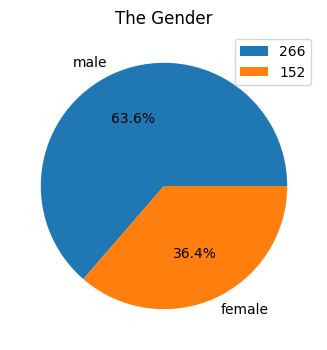

In [45]:
# Pie Chart of Sex
plt.rcParams['figure.figsize'] = (8,4)
labels = ['male', 'female']
size = train['Sex'].value_counts()
plt.pie(labels=labels,x=size,autopct='%1.1f%%',startangle=0)
plt.legend(train['Sex'].value_counts())
plt.title('The Gender')

<Axes: xlabel='Sex'>

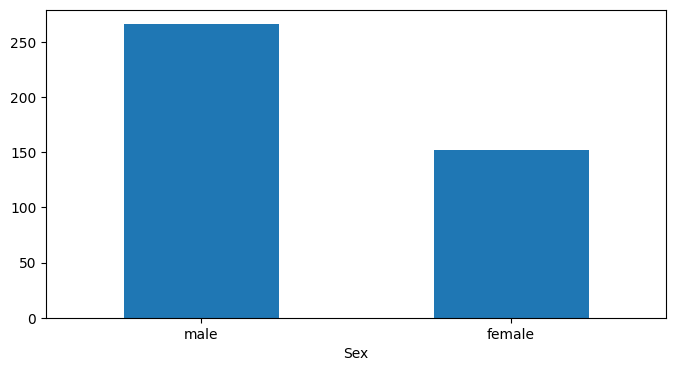

In [46]:
sex_counts = train['Sex'].value_counts()

sex_counts.plot(kind='bar', rot=0)

Text(0.5, 1.0, 'The Class')

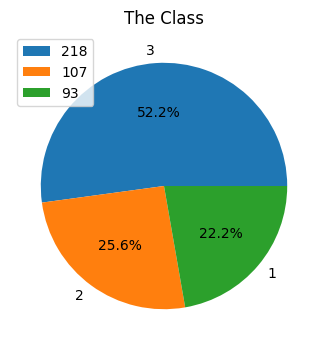

In [47]:
plt.rcParams['figure.figsize'] = (8,4)
labels = train['Pclass'].unique()
size = train['Pclass'].value_counts()
plt.pie(labels=labels,x=size,autopct='%1.1f%%',startangle=0)
plt.legend(train['Pclass'].value_counts(),loc='upper left')
plt.title('The Class')

Text(0.5, 1.0, 'The Survived')

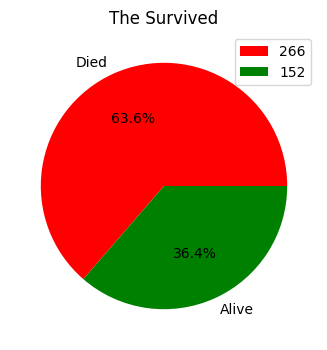

In [48]:
plt.rcParams['figure.figsize'] = (8,4)
labels = ['Died','Alive']
size = train['Survived'].value_counts()
plt.pie(labels=labels,x=size,autopct='%1.1f%%',startangle=0,colors=['red','green'])
plt.legend(train['Survived'].value_counts(),loc='upper right')
plt.title('The Survived')

<Axes: ylabel='Frequency'>

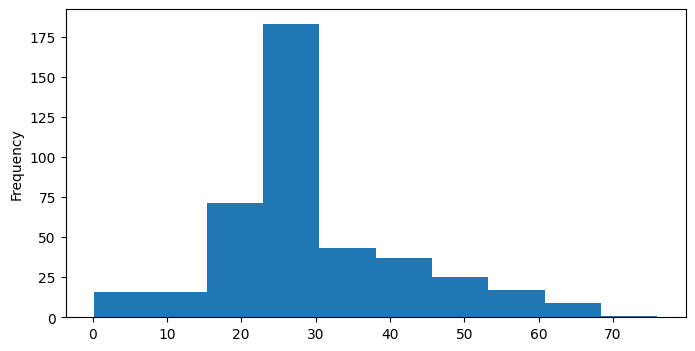

In [ ]:
train["Age"].plot.hist()

## Machine Learning Algorithms

### Split of Data

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket'], dtype='object')

In [ ]:
train.drop(['Sex','Ticket'],axis=1,inplace=True)
Train = train.drop(['Survived'], axis=1)
Test = train.iloc[:,1]
x_train, x_test, y_train, y_test = split(Train, Test, test_size = 0.3, random_state = 3)




### Logistic Regression

In [ ]:
lg = LR(solver='liblinear')
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
score = score(y_test,y_pred)
print('Logistic Regression Accuracy: {:.2f} %'.format(score*100))

Logistic Regression Accuracy: 88.89 %
